## Problem 7.5

The domain contains $n+1$ nodes. However, final node ($n+1$) has its temperature fixed at $\theta_1$ due to the boundary condition. As such, we do not need to ever solve for the temperature at this point. 

### Diffusivity matrix
The diffusivity matrix, $\mathbf{K}$, is therefore $(n \times n)$ and for constant grid spacing $\Delta x$ has the following components: 

$$
\begin{align}
K_{1\,1} &= 1/\Delta x \\  
K_{A\,A} &= 1/\Delta x_{A-1} + 1/\Delta x_{A} \\
         &= 2 / \Delta x \\
K_{A-1\,A} = K_{A\,A-1} &= - 1/\Delta x_{A-1} \\
         &= -1 / \Delta x \\ 
\end{align}
$$

or in matrix format 

$$
\mathbf{K} = \frac{1}{\Delta x} \begin{bmatrix}
    1 & -1 &    &    &       \\
   -1 &  2 & -1 &    &       \\
      & -1 &  2 & -1 &      \\
      &    & \ddots &  \ddots & \ddots&  \\
      &    &    & -1 &  2 & -1   \\
      &    &    & &-1 &  2 & -1   \\
      &    &    &    & & -1 &  2   \\
\end{bmatrix}
$$

### Forcing matrix

The forcing matrix components are defined as follows: 

#### Point $x_1$

$$
    F_1 = \frac{1}{\Delta x_1} \int_{x_1}^{x_2} (x_2 - x) \, h(x) \, \mathrm{d}x + H_0
$$
in the case that $h=0$ this is simply 
$$
    F_1 =  H_0\quad. 
$$

In the case that $h = 1$ this is 

$$
\begin{align}
    F_1 &= \frac{1}{\Delta x_1} \int_{x_1}^{x_2} (x_2 - x) \, \mathrm{d}x + H_0 \\
        &= \frac{1}{2 \Delta x_1} (x_2 - x_1)^2  + H_0 \\ 
        &= \frac{1}{2} (x_2 - x_1)  + H_0 \\ 
        &= \frac{1}{2} \Delta x_1  + H_0
\end{align}
$$


#### Internal points (A = 2, ... n)


For all points except the last ($2, ... n-1$), the forcing is given by 
$$
    F_A = \frac{1}{\Delta x_{A-1} } \int_{x_{A-1}}^{x_A} (x - x_{A-1})\, h(x)\, \mathrm{d}x \:+\: 
     \frac{1}{\Delta x_{A} } \int_{x_{A}}^{x_{A+1}} (x_{A+1} - x)\, h(x)\, \mathrm{d}x
$$

When $h=0$ this produces $F_A = 0$. When $h=1$ this produces
$$
\begin{align}
    F_1 &= \frac{1}{2 \Delta x_{A-1}} \left( x_A - x_{A-1} \right)^2  + \frac{1}{2 \Delta x_A} \left( x_{A+1} - x_{A} \right)^2  \\
     &= \frac{1}{2} \Delta x_{A-1}   + \frac{1}{2} \Delta x_{A}  \\
\end{align}
$$ which for a constant $\Delta x$ is simply equal to $\Delta x$ . 

The $n$'th node contains contributions from the last element and $\theta_1$, given in 7.54 as 
$$
F_n = \frac{1}{\Delta x_{n-1}} \int_{x_{n-1}}^{x_n} (x - x_{n-1})\, h(x) \: \mathrm{d}x + \frac{1}{\Delta x_{n}} \int_{x_{n}}^{x_{n+1}} (x_{n+1} - x)\, h(x) \: \mathrm{d}x \: + \frac{\theta_1}{\Delta x_n} \quad. 
$$


For the case that $h=0$ this reduces to 
\begin{equation}
F_n =  \frac{\theta_1}{\Delta x_n}, 
\end{equation}

where as for $h(x) = 1$ it is 

\begin{equation}
F_n = \frac{\Delta x_{n-1}}{2} + \frac{\Delta x_{n}}{2} + \frac{\theta_1}{\Delta x_n}, 
\end{equation}

### Case 1: h = 0

For 10 elements (n=10) the equations then becomes 


$$
\frac{1}{\Delta x}
\begin{bmatrix}
    1 & -1 &    &    &    &    &    & & &  \\
   -1 &  2 & -1 &    &    &    &    & & &    \\
      & -1 &  2 & -1 &    &    &    & & &    \\
      &    & -1 &  2 & -1 &    &    & & &    \\
      &    &    & -1 &  2 & -1 &    & & &  \\
      &    &    &    & -1 &  2 & -1 &    & &  \\
      &    &    &    &    & -1 &  2 & -1 & & \\ 
      &    &    &    &    &    & -1 &  2 & -1 &    & \\ 
      &    &    &    &    &    &    & -1 &  2 & -1 & \\ 
      &    &    &    &    &    &    &    & -1 &  2 & -1 \\
\end{bmatrix} \mathbf{\Theta} = 
\begin{bmatrix}
    H_0  \\ 
    0  \\
    0   \\
    0   \\
    0   \\
    0   \\
    0   \\
    0   \\
    0   \\
    \frac{\theta_1}{\Delta x}  \\
\end{bmatrix} 
$$ since $H_0$ = 1


The solution is then: 

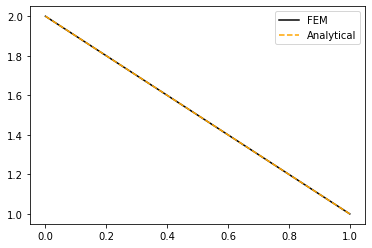

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

L = 1     # Domain 0 to L
n = 10    # Number of elements

# Boundary conditions
theta_1 = 1 
H0      = 1 

x = np.linspace(0, L, n+1)

dx = x[1:] - x[:-1]  # Delta x in each element

# Create matrix K
diag     =  2 * np.ones(n)     # Main diagonal
off_diag = -1 * np.ones(n-1)  # Off-diagonals
K = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Edit the first diagonal element
K[0,0]   = 1  

# Remember division by dx for K matrix
K = K/dx

# Create vector f: 

F = np.zeros(n)
F[0] = H0
F[-1] = theta_1 / dx[-1]


# Compute inverse matrix K^-1 
Kinv = np.linalg.inv(K)

# Compute theta 
theta = np.matmul(Kinv, F)

# Theta array for whole domain contains the n+1 point also: 
total_theta = np.zeros(n+1)
total_theta[:n] = theta
total_theta[-1] = theta_1



# Plot for comparison
fig, ax = plt.subplots()

# Plot FEM 
ax.plot(x, total_theta, 'k')

# Plot analytical
analytical = 1 + (1-x)*H0
ax.plot(x, analytical, '--', color='orange')
ax.legend(['FEM', 'Analytical']);

### Case 2: h = 0

Now lets look at the case when $h = 1$. Remember that $h$ doesn't affect the diffusivity matrix so all we need to do is compute the new $\mathbf{F}$ vector 

In [18]:
# Create a new F vector 
F = np.zeros(n)

for inode in range(n): 
    if inode == 0: 
        F[inode] = H0 + dx[0]/2  
    else: 
        F[inode] = 0.5 * (dx[inode-1] + dx[inode])

        
    # The last node (n) also gets an extra contribution 
    # note the python indexing from 0 here means its 'n-1'
    if inode == n-1: 
        F[inode] += theta_1/dx[inode]
        

# Now we can compute the temperature field: 
# Compute theta 
theta = np.matmul(Kinv, F)

# Theta array for whole domain contains the n+1 point also: 
total_theta = np.zeros(n+1)
total_theta[:n] = theta
total_theta[-1] = theta_1

Let us compare against an analytical solution (7.19) for $h(x)=1$ which ends up being 

\begin{equation}
    \theta(x) = \theta_1 + (1-x) H_0 + \frac{1}{2}(1-x^2) \quad.
\end{equation}

Note how the internal heating contributes an extra quadratic term compared to the case when $h=0$.

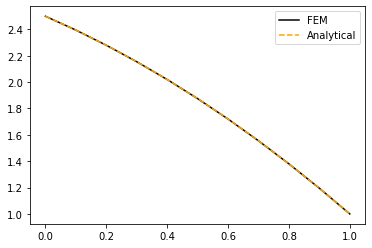

In [24]:
# Plot for comparison
fig, ax = plt.subplots()

# Plot FEM 
ax.plot(x, total_theta, 'k')

# Plot analytical
analytical = theta_1 + (1-x)*H0 + 0.5*(1 - x**2)
ax.plot(x, analytical, '--', color='orange')
ax.legend(['FEM', 'Analytical']);